# Experimenting with Seaborn Boxplot
Dataset is from [here](https://github.com/mwaskom/seaborn-data)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

In [2]:
# Importing the titanic dataset...
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


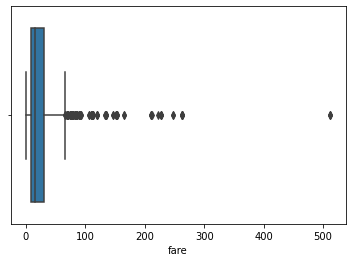

In [3]:
# Plotting the 'fare' column...
sns.boxplot(titanic.fare)

In [4]:
# Would be better without that outlier
# A little bit of FE...

# Any null values in the 'fare' column?
titanic[titanic.fare.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


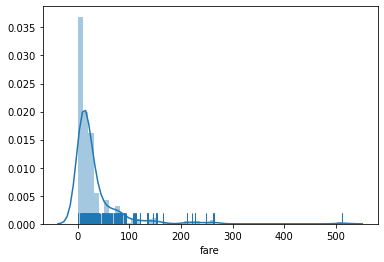

In [5]:
# Using distplot to find the distribution of values
sns.distplot(titanic.fare, rug=True)

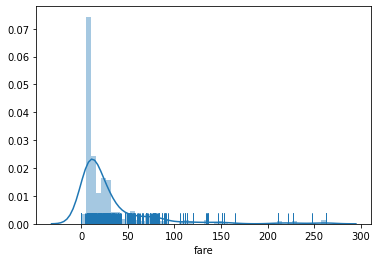

In [6]:
# Labeling the outlier(s)
titanic.loc[titanic.fare >= 300, 'fare_labeled'] = 'highest'

# Using distplot to find the distribution of values (excluding outliers)
sns.distplot(titanic.fare[titanic.fare_labeled != 'highest'], rug=True)

In [7]:
# Highly dense concentration for fares in the $0~50 bracket
# Medium density for fares in the $50~100 bracket
# Sparse density for fares above $100

titanic.loc[titanic.fare < 50, 'fare_labeled'] = 'low'
titanic.loc[(titanic.fare >= 50) & (titanic.fare < 100), 'fare_labeled'] = 'average'
titanic.loc[(titanic.fare >= 100) & (titanic.fare < 300), 'fare_labeled'] = 'high'

titanic.fare_labeled.value_counts()

low        730
average    108
high        50
highest      3
Name: fare_labeled, dtype: int64

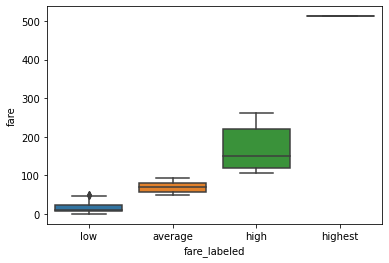

In [8]:
# Plotting the new column with the old ver.
sns.boxplot(data=titanic, x='fare_labeled', y='fare')

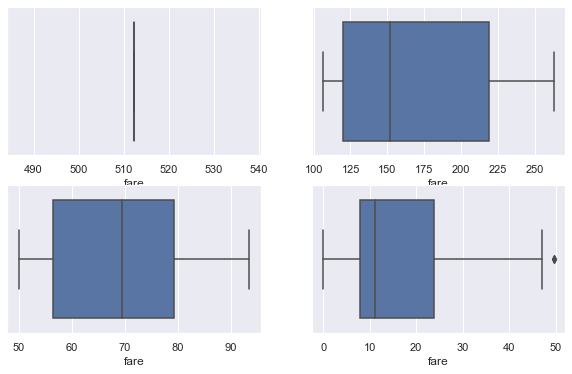

In [9]:
# Seeing the distribution of each new label
import matplotlib.pyplot as plt
from pylab import *

sns.set(rc={'figure.figsize': (10,6)})

subplot(2,2,1)
ax = sns.boxplot(titanic.fare[titanic.fare_labeled=='highest'])

subplot(2,2,2)
ax = sns.boxplot(titanic.fare[titanic.fare_labeled=='high'])

subplot(2,2,3)
ax = sns.boxplot(titanic.fare[titanic.fare_labeled=='average'])

subplot(2,2,4)
ax = sns.boxplot(titanic.fare[titanic.fare_labeled=='low'])

plt.show()

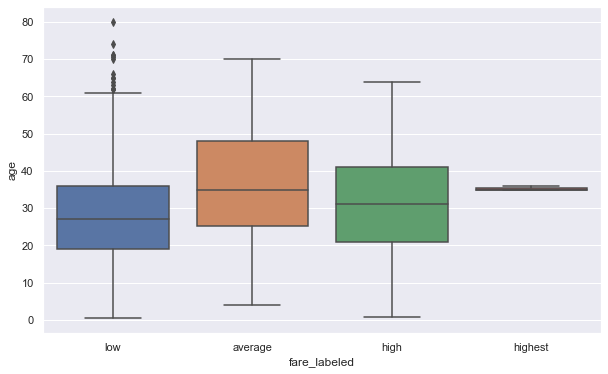

In [10]:
# Correlation between distribution of fare_labeled & age?
sns.boxplot(data=titanic, x='fare_labeled', y='age')

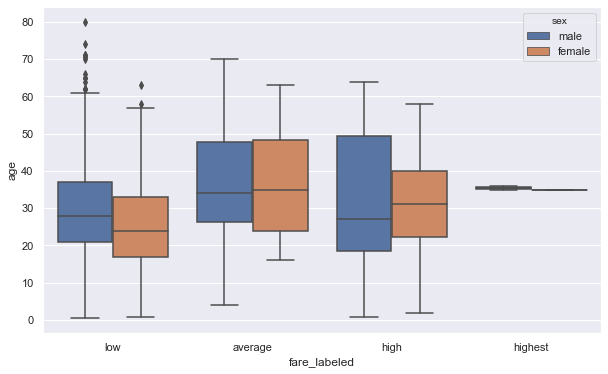

In [17]:
sns.boxplot(data=titanic, x='fare_labeled', y='age', hue='sex')

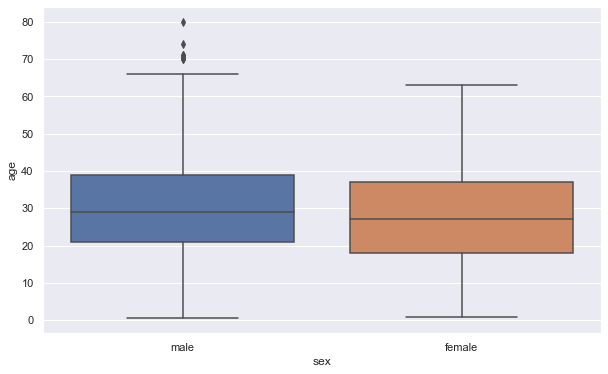

In [11]:
# age & sex?
sns.boxplot(data=titanic, x='sex', y='age')